<a href="https://colab.research.google.com/github/abhinavnautiyalDS/Email-Click-prediction/blob/main/Email_click_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement**

Email Marketing Campaign
Goal
Optimizing marketing campaigns is one of the most common data science tasks. Among the many marketing tools available, emails stand out as particularly efficient.
Emails are great because they are free, scalable, and can be easily personalized. Email optimization involves personalizing the content and/or the subject line, selecting the recipients, and determining the timing of the sends, among other factors. Machine Learning excels at this.






**Case Description**

The marketing team of an e-commerce site has launched an email campaign. This site has email addresses from all the users who created an account in the past.
They have chosen a random sample of users and emailed them. The email lets the user know about a new feature implemented on the site. From the marketing team perspective, success is if the user clicks on the link inside of the email. This link takes the user to the company site.
You are in charge of figuring out how the email campaign performed and were asked the following questions:
What percentage of users opened the email and what percentage clicked on the link within the email?

The VP of marketing thinks that it is stupid to send emails in a random way. Based on all the information you have about the emails that were sent, ***can you build a model to optimize in future how to send emails to maximize the probability of users clicking on the link inside the email?***
By how much do you think your model would improve click through rate (defined as # of users who click on the link/total users who receive the email). How would you test that?
Did you find any interesting pattern on how the email campaign performed for different segments of users? Explain.


## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import HalvingRandomSearchCV



import warnings
warnings.filterwarnings("ignore")

##**DATA UNDERSTANDING**

In [ ]:
click_df=pd.read_csv("/content/link_clicked_table.csv")

In [ ]:
open_df=pd.read_csv("/content/email_opened_table.csv")

email_df=pd.read_csv("/content/email_table.csv")

**Size**

In [ ]:
click_df.shape

(2119, 1)

In [ ]:
open_df.shape

(10345, 1)

In [ ]:
email_df.shape

(100000, 7)

**Creating a columns called click**

In [ ]:
#click_df

click_df['click']=pd.Series(np.ones(len(click_df))).astype(int)

In [ ]:
click_df

,email_id,click
0,609056,1
1,870980,1
2,935124,1
3,158501,1
4,177561,1
...,...,...
2114,873162,1
2115,435454,1
2116,206772,1
2117,742967,1


In [ ]:
#open_df

open_df.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [ ]:
#email_df

email_df


,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6
...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5
99996,899722,long_email,personalized,7,Saturday,US,1
99997,449610,long_email,personalized,11,Saturday,UK,6
99998,72497,short_email,generic,10,Monday,UK,0


**Merging**

In [ ]:
df1=email_df.merge(open_df,on='email_id',how='inner')

In [ ]:
df2=df1.merge(click_df,how='left')

In [ ]:
df2

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,click
0,966622,long_email,personalized,12,Sunday,UK,2,1.0
1,139620,short_email,personalized,9,Saturday,US,8,NaN
2,635573,short_email,personalized,3,Thursday,US,8,NaN
3,117471,long_email,personalized,5,Saturday,US,1,NaN
4,364825,short_email,personalized,6,Friday,UK,3,NaN
...,...,...,...,...,...,...,...,...
10340,191006,short_email,personalized,11,Sunday,US,6,NaN
10341,683747,short_email,personalized,8,Saturday,US,8,1.0
10342,893770,short_email,personalized,3,Monday,US,11,1.0
10343,188943,short_email,generic,9,Tuesday,US,2,NaN


**Filling null values in click with zero**

In [ ]:
df2.click.fillna(0,inplace=True)

df2['click']=df2.click.astype('int')

In [ ]:
#final df

df2

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,click
0,966622,long_email,personalized,12,Sunday,UK,2,1
1,139620,short_email,personalized,9,Saturday,US,8,0
2,635573,short_email,personalized,3,Thursday,US,8,0
3,117471,long_email,personalized,5,Saturday,US,1,0
4,364825,short_email,personalized,6,Friday,UK,3,0
...,...,...,...,...,...,...,...,...
10340,191006,short_email,personalized,11,Sunday,US,6,0
10341,683747,short_email,personalized,8,Saturday,US,8,1
10342,893770,short_email,personalized,3,Monday,US,11,1
10343,188943,short_email,generic,9,Tuesday,US,2,0


**Final dataset**

In [ ]:
#checking null values

df2.isna().sum()

,0
email_id,0
email_text,0
email_version,0
hour,0
weekday,0
user_country,0
user_past_purchases,0
click,0


In [ ]:
#checking duplicate values

df2.duplicated().sum()

np.int64(0)

In [ ]:
#checking unique value in each categorical column

for col in df2.columns:
  if df2[col].dtype=='object':
    print(f"unique values of {col}")
    print(df2[col].unique())

unique values of email_text
['long_email' 'short_email']
unique values of email_version
['personalized' 'generic']
unique values of weekday
['Sunday' 'Saturday' 'Thursday' 'Friday' 'Tuesday' 'Monday' 'Wednesday']
unique values of user_country
['UK' 'US' 'FR' 'ES']


In [ ]:
#checking numerical column

df2.describe()

,email_id,hour,user_past_purchases,click
count,10345.000000,10345.000000,10345.000000,10345.000000
mean,499067.179604,9.398743,4.686999,0.200000
std,289531.750750,4.218718,3.306502,0.400019
min,49.000000,1.000000,0.000000,0.000000
25%,247395.000000,6.000000,2.000000,0.000000
50%,499261.000000,9.000000,4.000000,0.000000
75%,752779.000000,12.000000,7.000000,0.000000
max,999920.000000,24.000000,22.000000,1.000000


In [ ]:
df2.dtypes

,0
email_id,int64
email_text,object
email_version,object
hour,int64
weekday,object
user_country,object
user_past_purchases,int64
click,int64


##**EDA**

### **Distribution of categorical features**


In [ ]:
cat_col=[i for i in df2.columns if df2[i].dtype=='object']

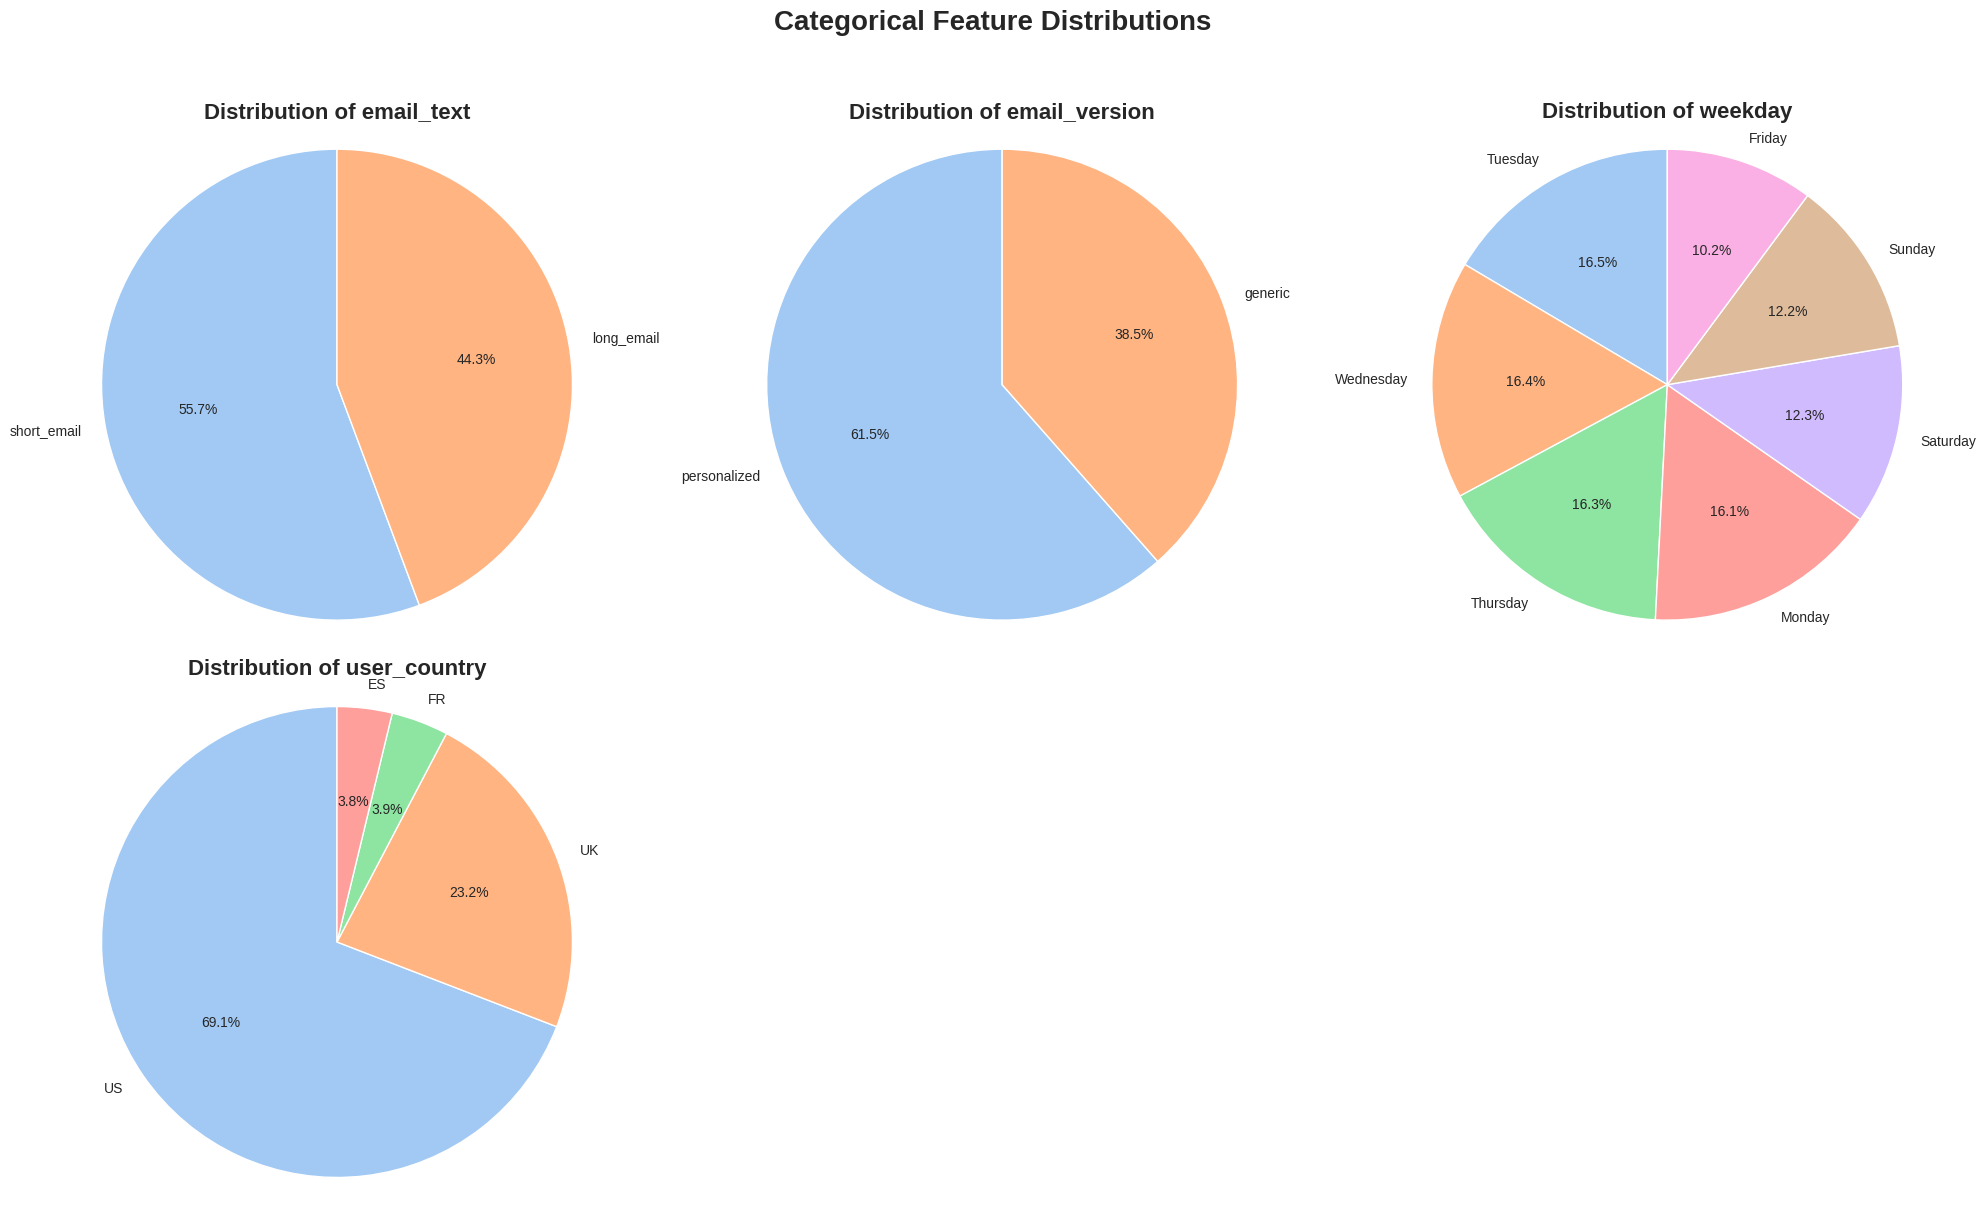

In [ ]:


plt.style.use('seaborn-v0_8-whitegrid')
colors = sns.color_palette('pastel')

fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

# Plot each categorical column as a pie chart
for i, col in enumerate(cat_col):
    value_counts = df2[col].value_counts()
    labels = value_counts.index
    sizes = value_counts.values

    axes[i].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white'}
    )
    axes[i].set_title(f"Distribution of {col}", fontsize=16, fontweight='bold')
    axes[i].axis('equal')  # Equal aspect ratio ensures pie is a circle

# Remove unused axes
for j in range(len(cat_col), 9):
    fig.delaxes(axes[j])

plt.suptitle('Categorical Feature Distributions', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()


**Insights**

- **Distribution of email_text**
  Short emails account for 55.7%, while long emails make up 44.3%.
  This suggests a slight preference toward sending shorter emails, which could imply an assumption that users engage better with concise content.

- **Distribution of email_version**
  Personalized emails dominate at 61.5%, whereas generic emails represent 38.5%.
  The emphasis on personalization aligns with best practices in email marketing, suggesting the team is already trying to optimize for engagement.

- **Distribution of weekday**
  Email distribution is fairly evenly spread across weekdays, with each day from Monday to Thursday having ~16% share.
  Friday (10.2%), Saturday (12.3%), and Sunday (12.2%) have comparatively fewer emails sent.
  This might indicate that marketing efforts are more focused on weekdays, possibly due to higher expected engagement during workdays.

- **Distribution of user_country**
  The majority of users are from the US (69.1%), followed by the UK (23.2%). France (3.9%) and Spain (3.8%) form smaller segments.

  The campaign is heavily skewed towards the US and UK markets, indicating a primary audience focus on English-speaking regions.

### **Distribution of numerical features**


In [ ]:
num_col=[i for i in df2.columns if df2[i].dtype=='int']

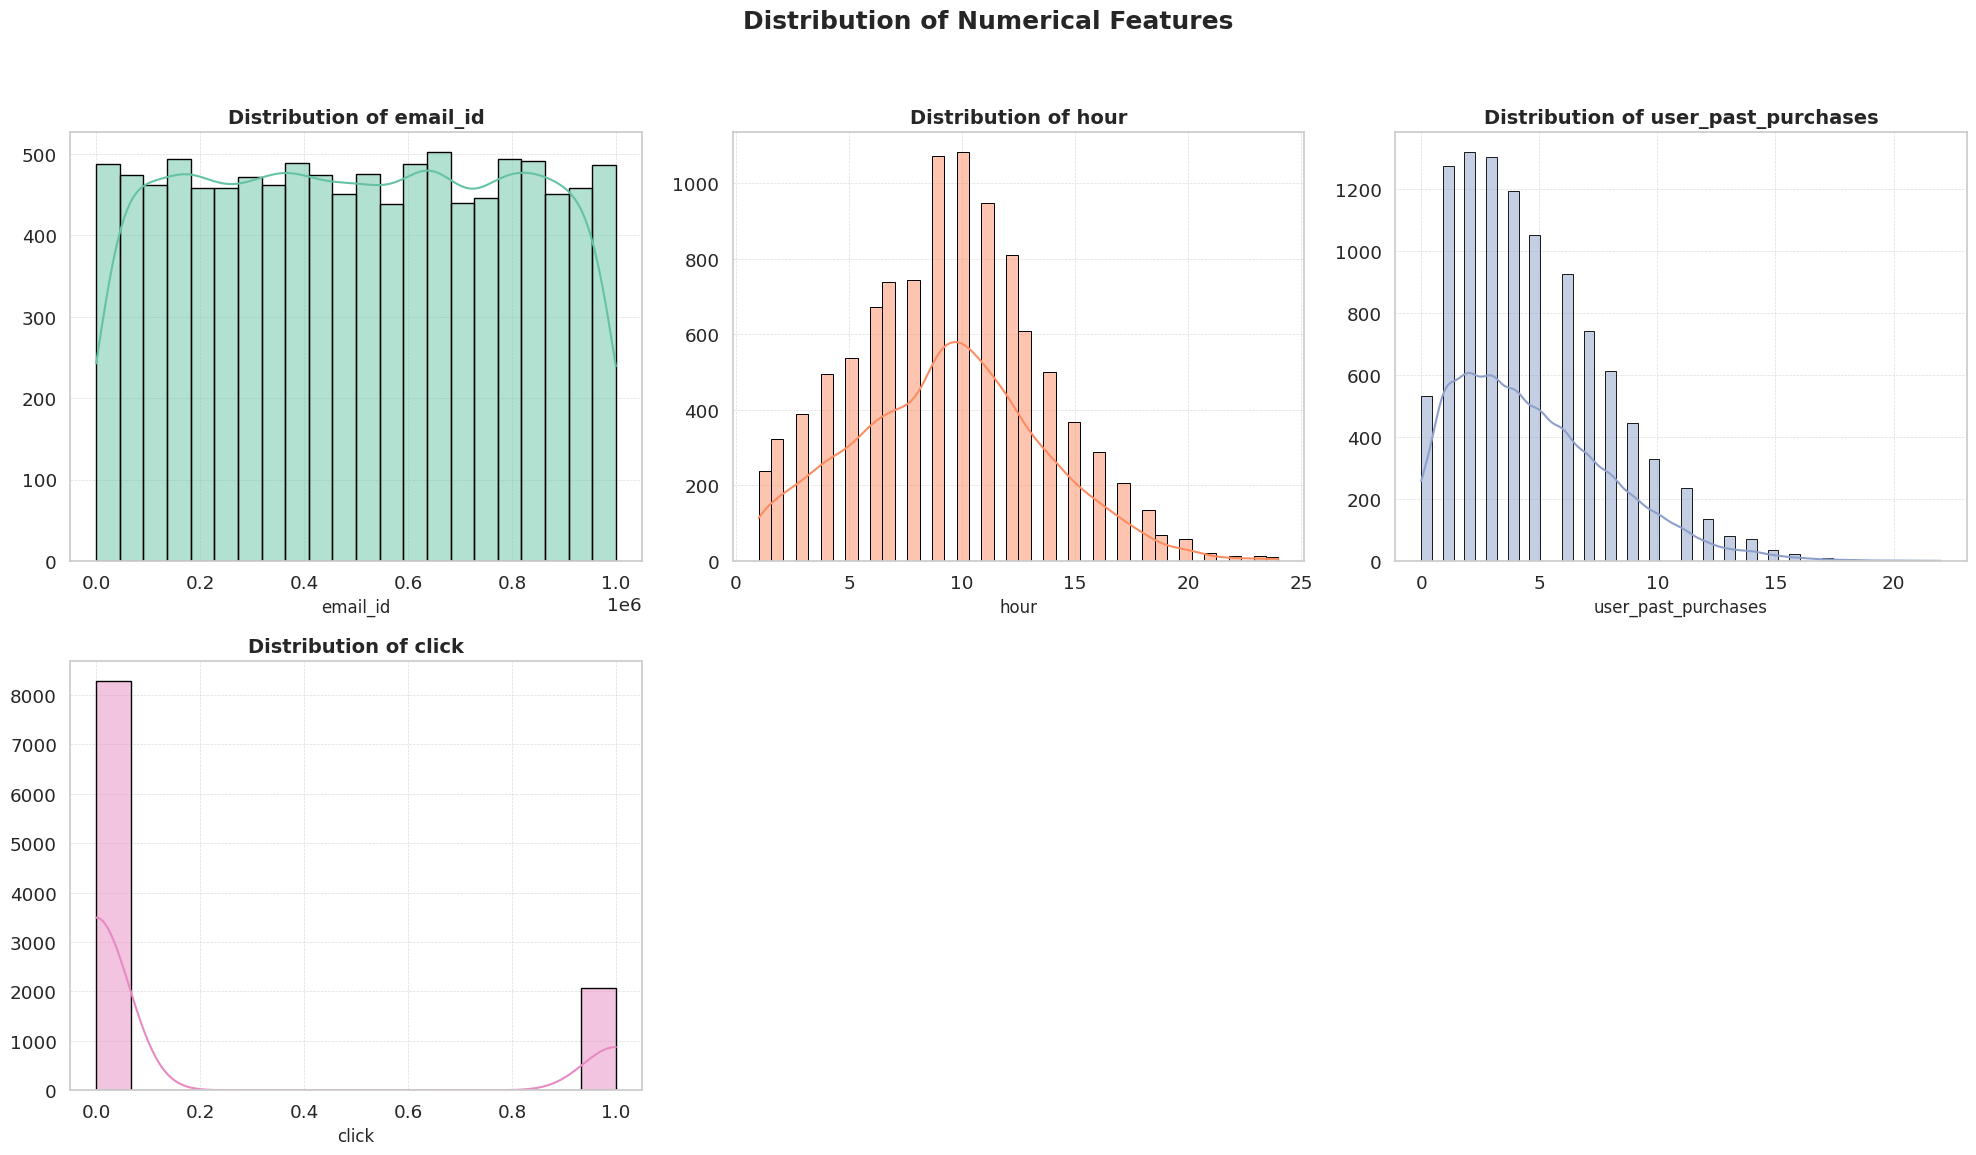

In [ ]:

sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()

# Plot each numerical column with improved aesthetics
for i, col in enumerate(num_col):
    sns.histplot(
        data=df2,
        x=col,
        kde=True,
        ax=axes[i],
        color=sns.color_palette("Set2")[i % len(sns.color_palette("Set2"))],
        edgecolor='black'
    )
    axes[i].set_title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('')
    axes[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Hide any unused subplots
for j in range(len(num_col), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.suptitle("Distribution of Numerical Features", fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


**Insights**

Most marketing emails are sent in the morning, which may be effective and should be tested further.

The majority of users are low-engagement buyers; segmenting high-value users separately might be useful.

The target variable is imbalanced, so model evaluation should go beyond accuracy (e.g., using precision, recall, AUC).

Consider testing if email timing or user purchase history correlates with click behavior to drive more personalized campaigns.

### **Since our target feature here is click , lets check factor affecting it**

**weekday vs clicks**

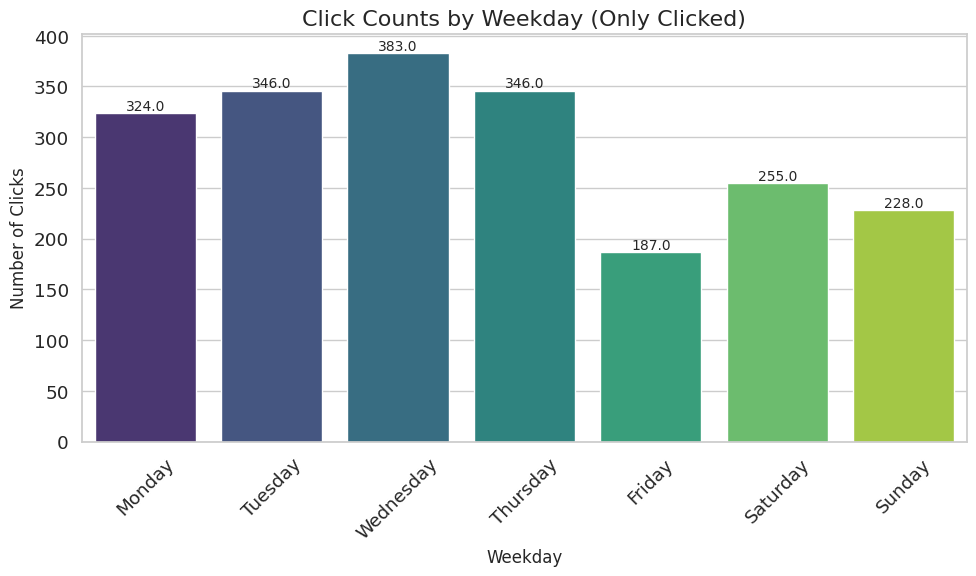

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Better plot
sns.countplot(
    data=df2[df2.click == 1],
    x='weekday',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='viridis'
)

# Adding titles and labels
plt.title('Click Counts by Weekday (Only Clicked)', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Number of Clicks', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Optional: Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
#categorising weekdays
def segment_weekday(day):
    if day in ['Monday', 'Tuesday']:
        return 'Early_Week'
    elif day in ['Wednesday', 'Thursday']:
        return 'Mid_Week'
    else:
        return 'Late_Week'

df2['weekday_segment'] = df2['weekday'].apply(segment_weekday)




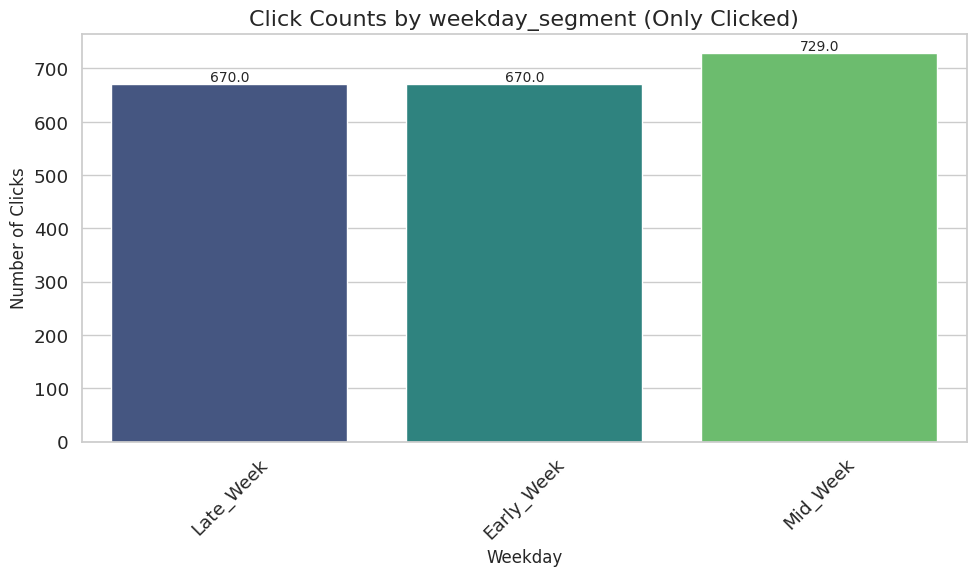

In [ ]:



plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Better plot
sns.countplot(
    data=df2[df2.click == 1],
    x='weekday_segment',

    palette='viridis'
)

# Adding titles and labels
plt.title('Click Counts by weekday_segment (Only Clicked)', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Number of Clicks', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Optional: Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**email version vs click**


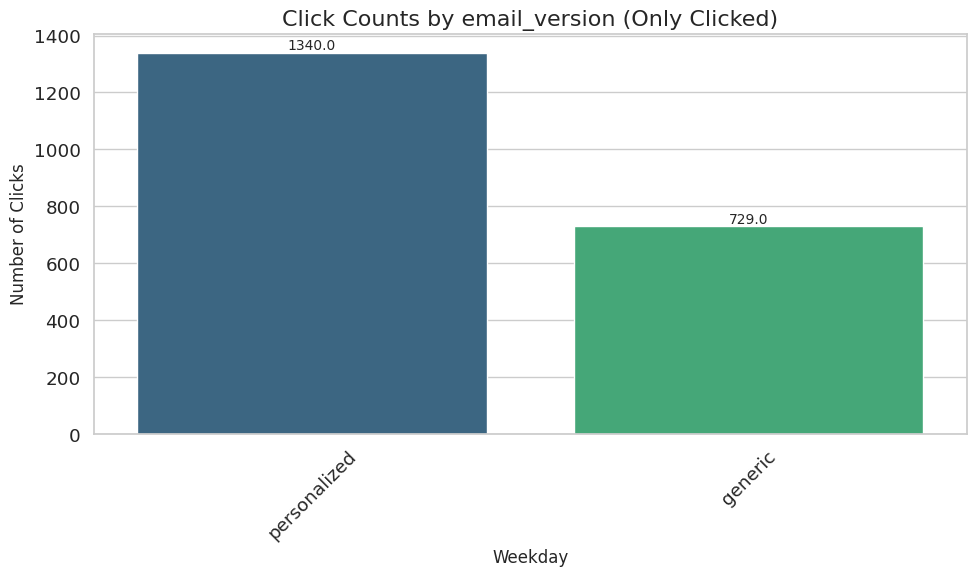

In [ ]:


plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Better plot
sns.countplot(
    data=df2[df2.click == 1],
    x='email_version',

    palette='viridis'
)

# Adding titles and labels
plt.title('Click Counts by email_version (Only Clicked)', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Number of Clicks', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Optional: Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**Insights**

Personalized emails received significantly more clicks (1340) than generic ones (729), showing nearly 84% higher engagement. This suggests that customising content for recipients—such as using their names or tailored recommendations—increases relevance, trust, and encourages action. Generic emails may feel impersonal or spammy, reducing user interaction.

**email_text vs clickes**


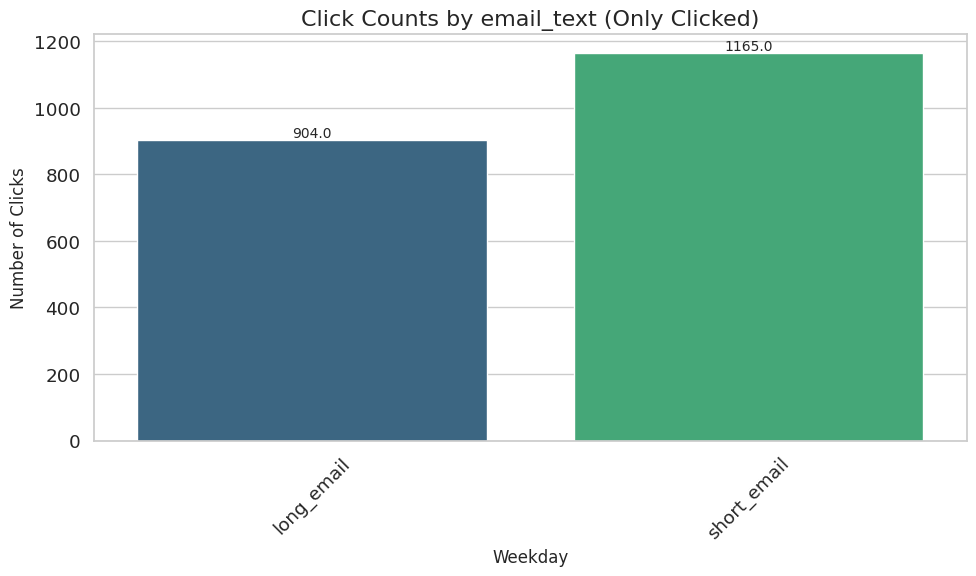

In [ ]:



plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Better plot
sns.countplot(
    data=df2[df2.click == 1],
    x='email_text',

    palette='viridis'
)

# Adding titles and labels
plt.title('Click Counts by email_text (Only Clicked)', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Number of Clicks', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Optional: Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**Insights**
Short emails generated more clicks (1165) compared to long emails (904). This suggests that concise messaging is more effective in grabbing users’ attention and prompting action. Readers likely prefer quick, scannable content over lengthy text, especially in crowded inboxes.

**Hour vs clicks**

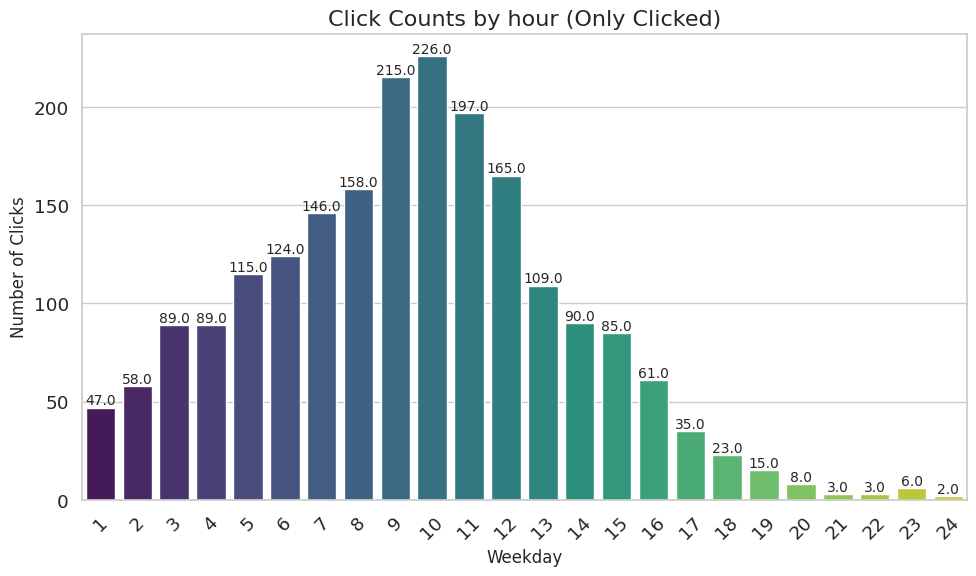

In [ ]:


plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Better plot
sns.countplot(
    data=df2[df2.click == 1],
    x='hour',

    palette='viridis'
)

# Adding titles and labels
plt.title('Click Counts by hour (Only Clicked)', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Number of Clicks', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Optional: Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()




**defining time categories**

In [ ]:
#categories
#time

def row(x):
  if x >=5 and x< 12:
    return "Morning"
  elif x>=12 and x<17:
    return "Afternoon"
  elif x>=17 and x<22:
    return "Evening"
  else:
    return "Night"

df2['Time_range']=df2.hour.apply(row)


**Timeranges vs clicks**

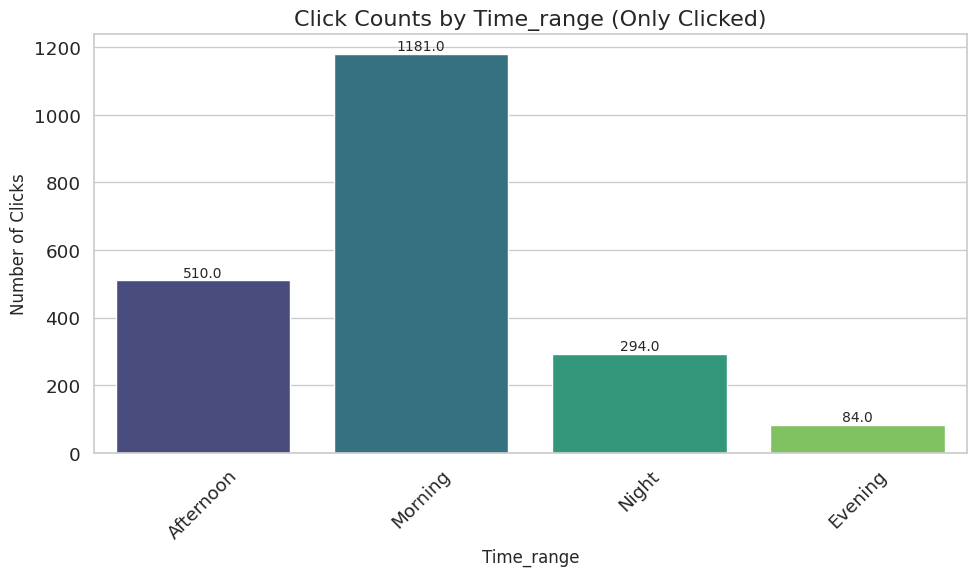

In [ ]:



plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Better plot
sns.countplot(
    data=df2[df2.click == 1],
    x='Time_range',

    palette='viridis'
)

# Adding titles and labels
plt.title('Click Counts by Time_range (Only Clicked)', fontsize=16)
plt.xlabel('Time_range', fontsize=12)
plt.ylabel('Number of Clicks', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Optional: Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()




**Country vs clicks**

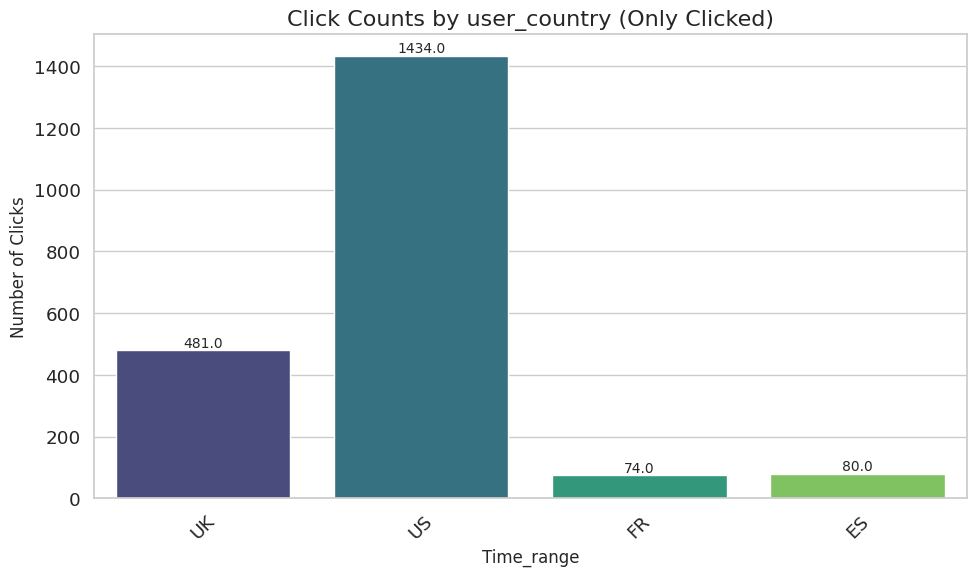

In [ ]:

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Better plot
sns.countplot(
    data=df2[df2.click == 1],
    x='user_country',

    palette='viridis'
)

# Adding titles and labels
plt.title('Click Counts by user_country (Only Clicked)', fontsize=16)
plt.xlabel('Time_range', fontsize=12)
plt.ylabel('Number of Clicks', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Optional: Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()





**User_past_purchases vs clicks**

<Axes: xlabel='click'>

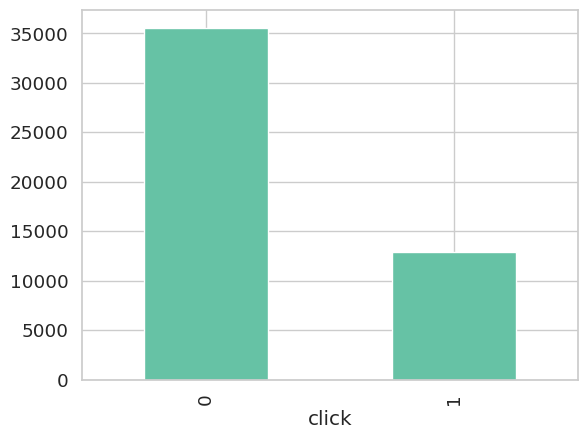

In [ ]:
df2.groupby('click')['user_past_purchases'].sum().plot(kind='bar')

## **Data Preprocessing**

In [ ]:
df=df2.copy()

### **Label Encoding**

In [ ]:
#label encoding
cat_col=[i for i in df.columns if df[i].dtype=='object']

In [ ]:
cat_col

['email_text',
 'email_version',
 'weekday',
 'user_country',
 'weekday_segment',
 'Time_range']

In [ ]:
df = pd.get_dummies(df, columns=cat_col).astype(int)


In [ ]:
df.columns

Index(['email_id', 'hour', 'user_past_purchases', 'click',
       'email_text_long_email', 'email_text_short_email',
       'email_version_generic', 'email_version_personalized', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'user_country_ES', 'user_country_FR', 'user_country_UK',
       'user_country_US', 'weekday_segment_Early_Week',
       'weekday_segment_Late_Week', 'weekday_segment_Mid_Week',
       'Time_range_Afternoon', 'Time_range_Evening', 'Time_range_Morning',
       'Time_range_Night'],
      dtype='object')

In [ ]:
df=df.drop(['email_id','hour','weekday_Friday','weekday_Monday','weekday_Saturday','weekday_Sunday','weekday_Wednesday','weekday_Tuesday','weekday_Thursday'],axis=1)

In [ ]:
# df2['user_past_purchases']=(df2['user_past_purchases']-df2['user_past_purchases'].min())/(df2['user_past_purchases'].max()-df2['user_past_purchases'].min())

###**Imbalanced Dataset**

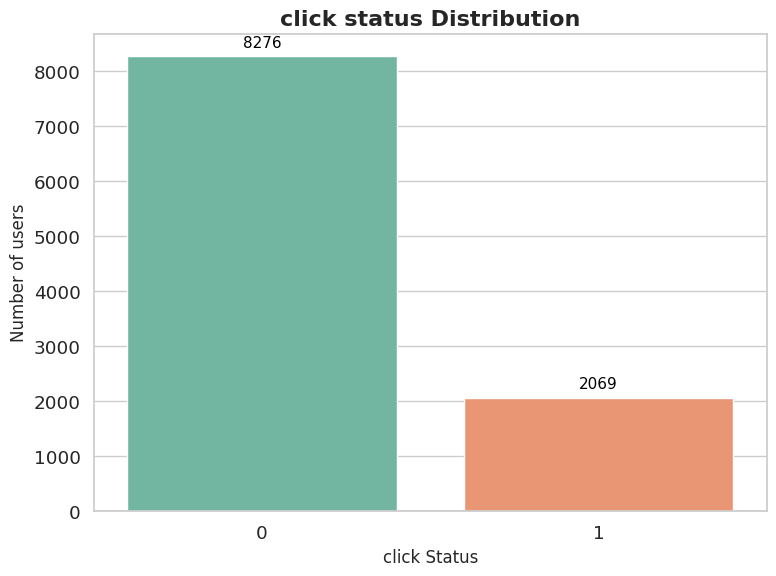

In [ ]:


plt.figure(figsize=(8, 6)) #before smote
sns.set_style("whitegrid")

sns.countplot(data=df, x='click', palette='Set2')

plt.title('click status Distribution', fontsize=16, fontweight='bold')
plt.xlabel('click Status', fontsize=12)
plt.ylabel('Number of users', fontsize=12)

# Annotate count on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black',
                       xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()




#### **Smote to balance my dataset**

In [ ]:
#smote

#SMote to balance classes'

from imblearn.over_sampling import SMOTE

# Step 1: Separate features and target
X = df.drop('click', axis=1)
y = df['click']

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Check class balance
import numpy as np
print("Class distribution after SMOTE:", np.bincount(y_resampled))


Class distribution after SMOTE: [8276 8276]


In [ ]:
df=pd.concat([X_resampled,y_resampled],axis=1)

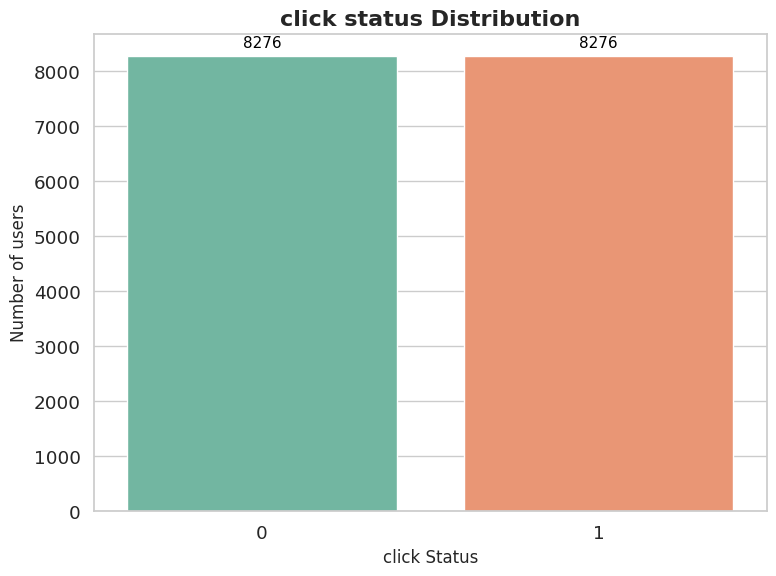

In [ ]:


plt.figure(figsize=(8, 6)) #before smote
sns.set_style("whitegrid")

sns.countplot(data=df, x='click', palette='Set2')

plt.title('click status Distribution', fontsize=16, fontweight='bold')
plt.xlabel('click Status', fontsize=12)
plt.ylabel('Number of users', fontsize=12)

# Annotate count on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black',
                       xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()




### **Feature Selection**

I am gonna do feature selection using lasso regression

In [ ]:
df

,user_past_purchases,email_text_long_email,email_text_short_email,email_version_generic,email_version_personalized,user_country_ES,user_country_FR,user_country_UK,user_country_US,weekday_segment_Early_Week,weekday_segment_Late_Week,weekday_segment_Mid_Week,Time_range_Afternoon,Time_range_Evening,Time_range_Morning,Time_range_Night,click
0,2,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
1,8,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
2,8,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
4,3,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16547,8,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1
16548,2,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
16549,7,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1
16550,8,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1


In [ ]:
df2

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,click,weekday_segment,Time_range
0,966622,long_email,personalized,12,Sunday,UK,2,1,Late_Week,Afternoon
1,139620,short_email,personalized,9,Saturday,US,8,0,Late_Week,Morning
2,635573,short_email,personalized,3,Thursday,US,8,0,Mid_Week,Night
3,117471,long_email,personalized,5,Saturday,US,1,0,Late_Week,Morning
4,364825,short_email,personalized,6,Friday,UK,3,0,Late_Week,Morning
...,...,...,...,...,...,...,...,...,...,...
10340,191006,short_email,personalized,11,Sunday,US,6,0,Late_Week,Morning
10341,683747,short_email,personalized,8,Saturday,US,8,1,Late_Week,Morning
10342,893770,short_email,personalized,3,Monday,US,11,1,Early_Week,Night
10343,188943,short_email,generic,9,Tuesday,US,2,0,Early_Week,Morning


In [ ]:
df=df.sample(16552)

In [ ]:

# Define alpha values to test
alphas = [0.001, 0.003, 0.006, 0.009, 0.01,0.05,0.09,0.1]

# Create a DataFrame to store the coefficients
coef_df = pd.DataFrame(index=X.columns)

X=df.drop(columns=['click'])
y=df['click']

# Fit Lasso for each alpha and store coefficients
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso.fit(X, y)
    coef_df[alpha] = np.abs(lasso.coef_)  # Use abs to show importance

# Optional: Sort by average importance
coef_df['mean_importance'] = coef_df.mean(axis=1)
coef_df = coef_df.sort_values('mean_importance', ascending=False)
coef_df = coef_df.drop(columns='mean_importance')

# Show result
coef_df


,0.001,0.003,0.006,0.009,0.01,0.05,0.09,0.1
user_country_FR,0.483713,0.161224,0.010546,0.000000,0.000000,0.000000,0.000000,0.000000
Time_range_Evening,0.458110,0.127766,0.028345,0.000000,0.000000,0.000000,0.000000,0.000000
user_country_ES,0.402561,0.084314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
user_country_UK,0.308565,0.041772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Time_range_Night,0.316450,0.027232,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
user_country_US,0.287980,0.038467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Time_range_Afternoon,0.296269,0.018358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
email_version_generic,0.182327,0.045588,0.030926,0.017746,0.013439,0.000000,0.000000,0.000000
weekday_segment_Late_Week,0.229212,0.037345,0.013714,0.000122,0.000000,0.000000,0.000000,0.000000
user_past_purchases,0.032587,0.037053,0.037186,0.036997,0.036912,0.033589,0.030275,0.029446


All features are important

## **Model Building**

### **Data Splitting**

In [ ]:
X=df.drop(columns='click')
Y=df['click']

In [ ]:


X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, stratify=Y_train, random_state=42)

### **Hyperparamter tuning**

In [ ]:
#hyperparamter tuning techniques

import time

from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV


def Hyperparameter_tuning(model,X_train,Y_train,param_grid,tuning_model):
  start=time.time()
  if tuning_model=='RandomizedSearchCV':
    n_iter=int(input("n_iter :"))
    cv=int(input("Cv :"))
    rf_grid=RandomizedSearchCV(
        estimator=model,param_distributions=param_grid,n_iter=n_iter,n_jobs=-1,cv=cv, verbose=1,scoring='accuracy', random_state=42
    )

    try:
      rf_grid.fit(X_train, Y_train)
      return f"""Best parameters by RandomizedSearchCV: {rf_grid.best_params_},
      Best cross-validation score: {rf_grid.best_score_}
      execution time : {round(time.time()-start)} sec
      """

    except Exception as e:
        return f"An error occurred: {e}"
  else:
    start=time.time()
    hr_grid=HalvingRandomSearchCV(
        estimator=model,param_distributions=param_grid,cv=3,n_jobs=-1,factor=3,verbose=1,scoring='accuracy'
    )
    try:
      hr_grid.fit(X_train, Y_train)
      return f"""
      Best parameters by HalvingRandomSearchCV: {hr_grid.best_params_},
      Best cross-validation score: {hr_grid.best_score_}
      execution time : {round(time.time()-start)} sec
      """
    except Exception as e:
        return f"An error occurred: {e}"


### **Evaluation Metrics**

In [ ]:

def Evaluation_Metrics(model_object, X_test, Y_test):
    # Ensure Y_test is numeric
    Y_test = np.array(Y_test, dtype=int)

    # Predictions
    Y_pred = model_object.predict(X_test)
    y_probs = model_object.predict_proba(X_test)[:, 1]

    # Ensure Y_pred is numeric
    Y_pred = np.array(Y_pred, dtype=int)

    # Compute metrics
    mat = {
        'Accuracy Score': accuracy_score(Y_test, Y_pred),
        'Recall Score': recall_score(Y_test, Y_pred),
        'Precision Score': precision_score(Y_test, Y_pred),
        'F1 Score': f1_score(Y_test, Y_pred),
        'ROC AUC Score': roc_auc_score(Y_test, y_probs)
    }

    mat_df = pd.DataFrame.from_dict(mat, orient='index', columns=['Score'])

    return visualise(model_object, X_test, Y_test), mat_df


In [ ]:

def visualise(model_object, X_test, Y_test):
    Y_pred = model_object.predict(X_test)
    y_probs = model_object.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
    roc_auc = roc_auc_score(Y_test, y_probs)

    # Create subplots
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # Plot ROC Curve
    ax[0].plot(fpr, tpr, color='red', lw=2, linestyle='--', label='ROC curve (area = %0.2f)' % roc_auc)
    ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver Operating Characteristic (ROC)')
    ax[0].legend(loc="lower right")

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    labels = np.array([['True Neg: {}\n({:.2f}%)'.format(conf_matrix[0, 0], conf_matrix_normalized[0, 0] * 100),
                        'False Pos: {}\n({:.2f}%)'.format(conf_matrix[0, 1], conf_matrix_normalized[0, 1] * 100)],
                       ['False Neg: {}\n({:.2f}%)'.format(conf_matrix[1, 0], conf_matrix_normalized[1, 0] * 100),
                        'True Pos: {}\n({:.2f}%)'.format(conf_matrix[1, 1], conf_matrix_normalized[1, 1] * 100)]])

    sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'], ax=ax[1])
    ax[1].set_xlabel('Predicted Labels')
    ax[1].set_ylabel('True Labels')
    ax[1].set_title('Confusion Matrix')

    plt.tight_layout()
    plt.show()


### **1. Logistic Regression**

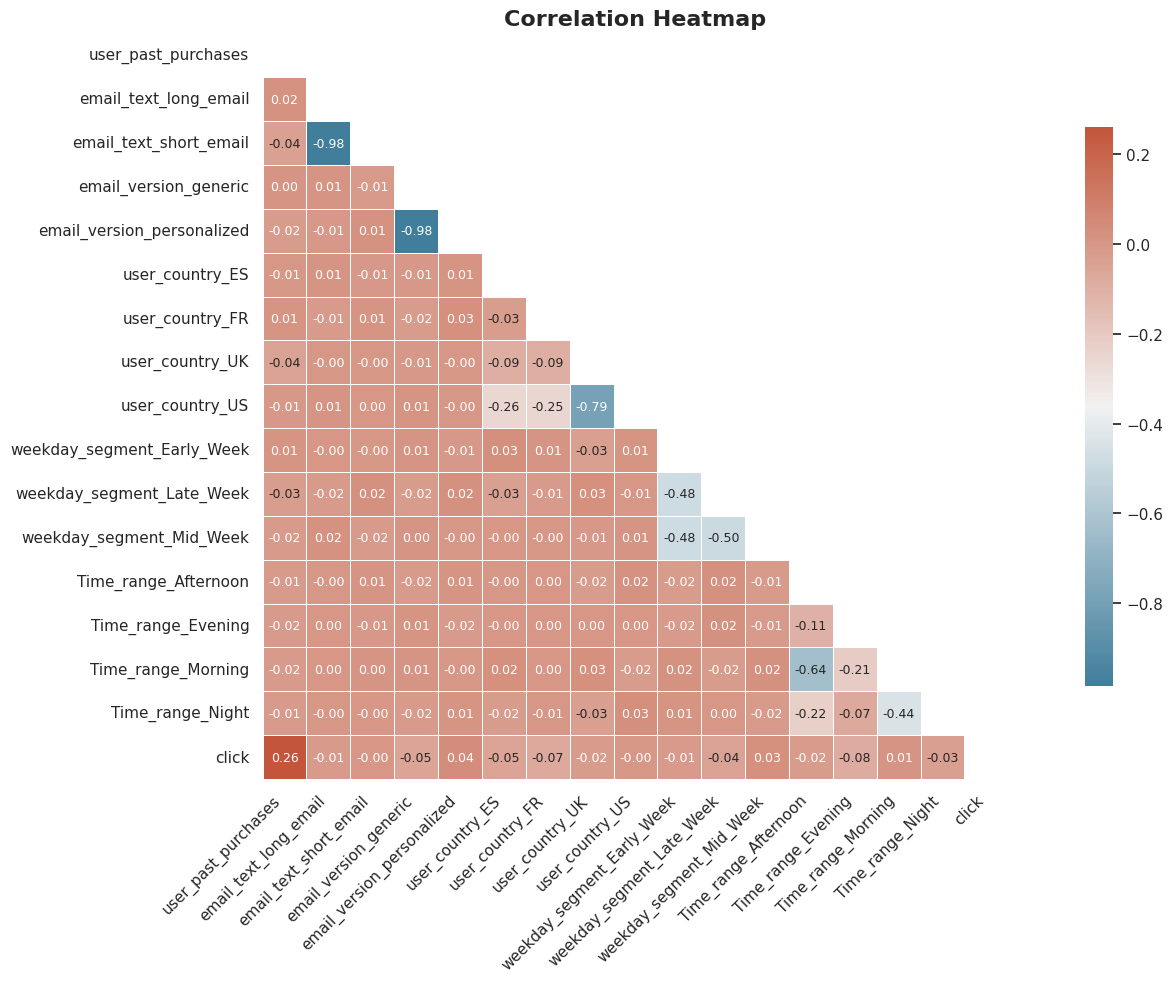

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))  # Adjust the size as needed
sns.set(style='white')  # Clean background

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Choose a better diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    df.corr(),
    mask=mask,
    cmap=cmap,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 9}
)

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
L=LogisticRegression()
L.fit(X_train,Y_train)

LogisticRegression()

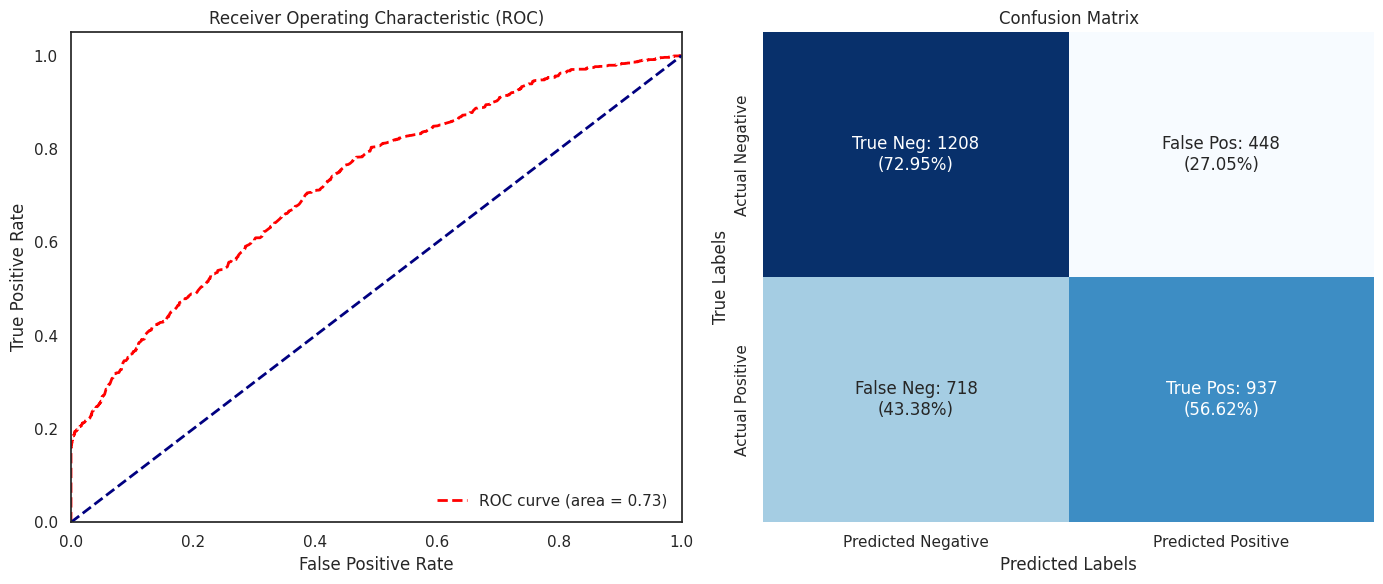

(None,                     Score
Accuracy Score   0.647841
Recall Score     0.566163
Precision Score  0.676534
F1 Score         0.616447
ROC AUC Score    0.727006)


In [ ]:
print(Evaluation_Metrics(L, X_val, Y_val))

**Hyperparameter Tuning**

In [ ]:
1
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 10, 40, 100],
    'solver': ['saga'],  # 'saga' supports 'l1', 'l2', and 'elasticnet'
    'l1_ratio': [0.1, 0.5, 0.9]  # Only required if using 'elasticnet'
}
print(Hyperparameter_tuning(L,X_test,Y_test,param_grid,'HalvingRandomSearchCV'))
print(Hyperparameter_tuning(L,X_test,Y_test,param_grid,'RandomizedSearchCV'))


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 5
min_resources_: 12
max_resources_: 1325
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 45
n_resources: 12
Fitting 3 folds for each of 45 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 15
n_resources: 36
Fitting 3 folds for each of 15 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 5
n_resources: 108
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 2
n_resources: 324
Fitting 3 folds for each of 2 candidates, totalling 6 fits

      Best parameters by HalvingRandomSearchCV: {'solver': 'saga', 'penalty': 'l1', 'l1_ratio': 0.5, 'C': 40},
      Best cross-validation score: 0.6626860505365179
      execution time : 4 sec
      
n_iter :5
Cv :10
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best parameters by RandomizedSearchCV: {'solver': 'saga', 'penalty': 'l1', 'l1_ratio': 0.5, 'C': 100},
      Best cross-vali

**Training on best parameters**

In [ ]:
#after hyperparameter tuning
L1=LogisticRegression(C=100, l1_ratio=0.5, penalty='l2', solver='saga')
L1.fit(X_train,Y_train)

LogisticRegression(C=100, l1_ratio=0.5, solver='saga')

Evaluation Before Hyperparameter Tuning 


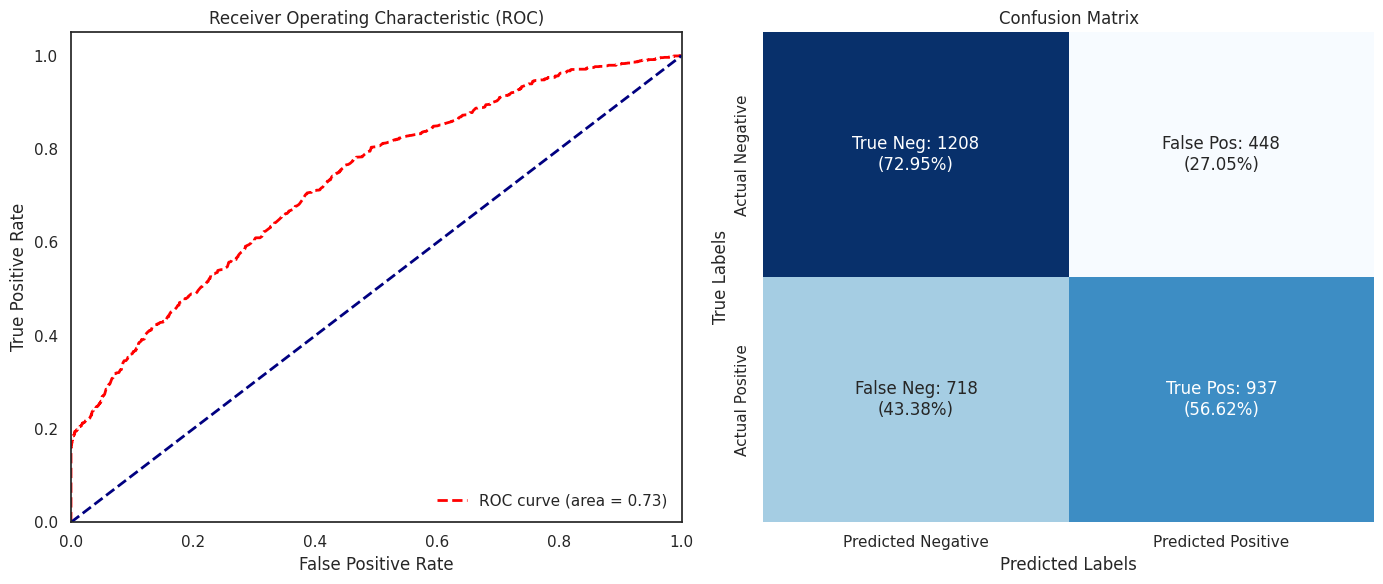

(None,                     Score
Accuracy Score   0.647841
Recall Score     0.566163
Precision Score  0.676534
F1 Score         0.616447
ROC AUC Score    0.727006)
Evaluation after Hyperparameter Tuning 


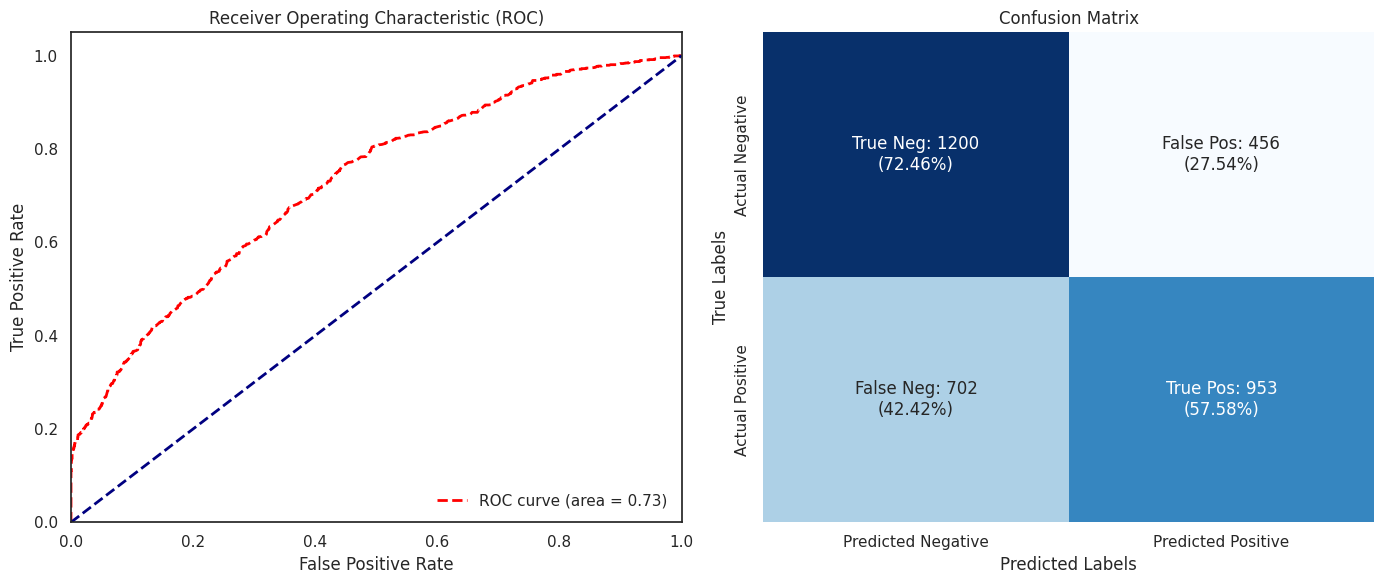

(None,                     Score
Accuracy Score   0.650257
Recall Score     0.575831
Precision Score  0.676366
F1 Score         0.622063
ROC AUC Score    0.726023)
Evaluating the model's performance on an unseen dataset.


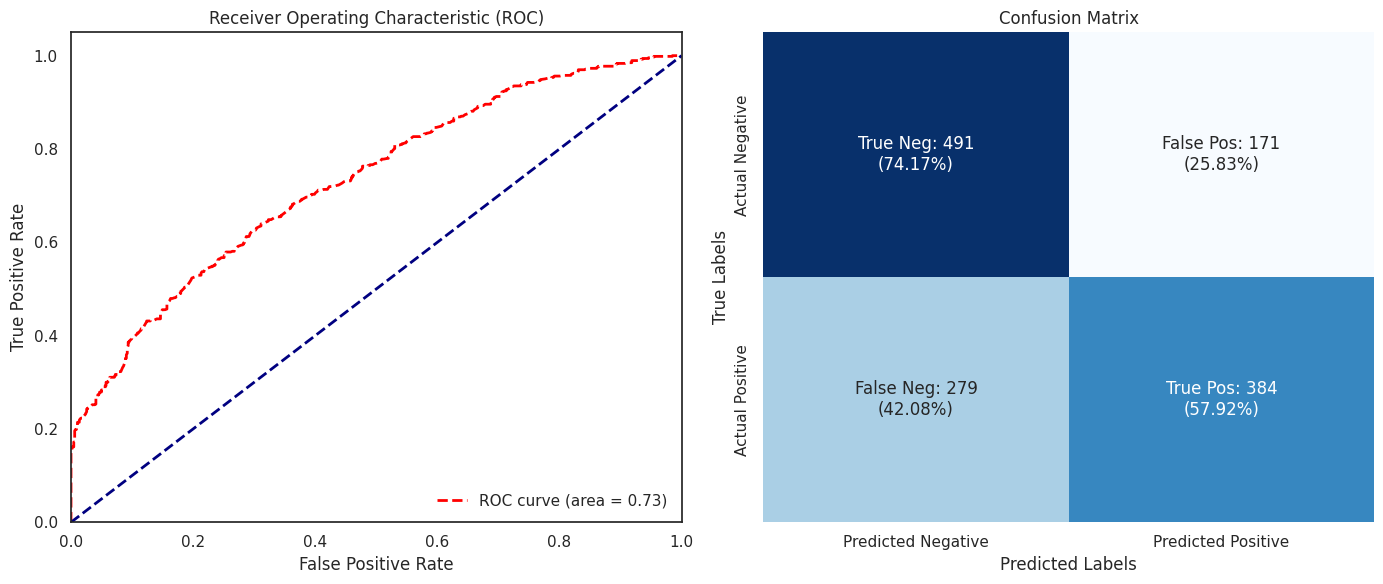

(None,                     Score
Accuracy Score   0.660377
Recall Score     0.579186
Precision Score  0.691892
F1 Score         0.630542
ROC AUC Score    0.730096)


In [ ]:
#Evaluation Metrix
#Evaluation metrics and Roc_curve

print("Evaluation Before Hyperparameter Tuning ")
print(Evaluation_Metrics(L,X_val,Y_val))

print("Evaluation after Hyperparameter Tuning ")
print(Evaluation_Metrics(L1,X_val,Y_val))

print("Evaluating the model's performance on an unseen dataset.")
print(Evaluation_Metrics(L1,X_test,Y_test))


### **2. DecisionTreeClassifier**

In [ ]:
D=DecisionTreeClassifier()
D.fit(X_train,Y_train)

DecisionTreeClassifier()

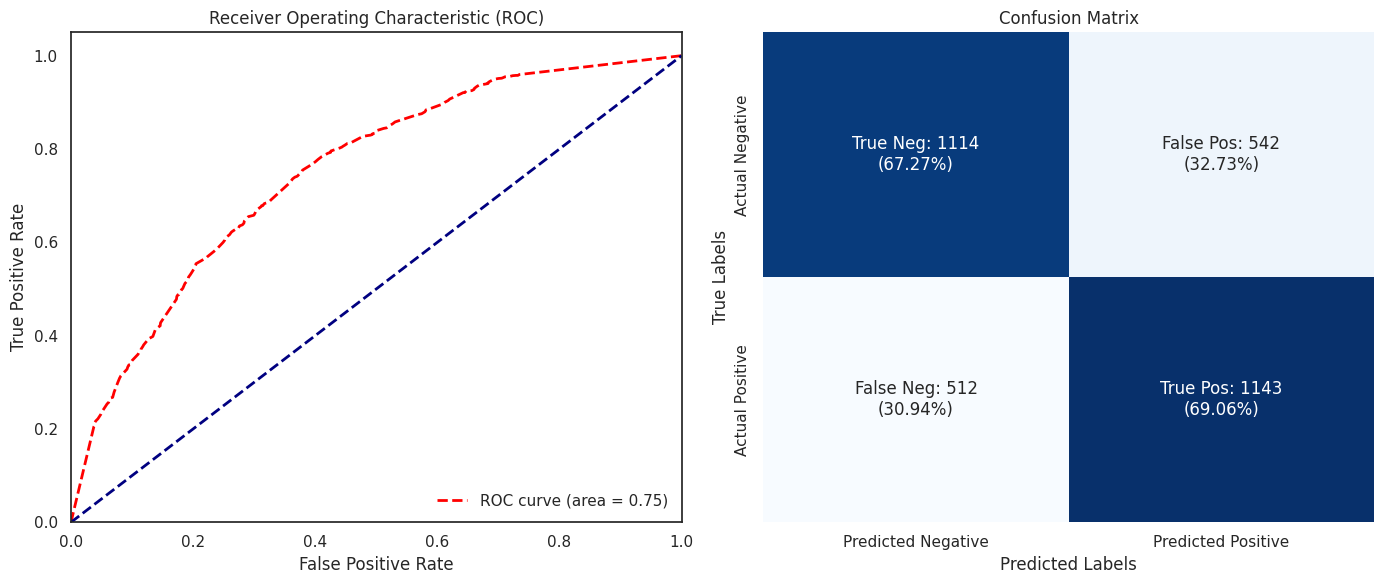

(None,                     Score
Accuracy Score   0.681667
Recall Score     0.690634
Precision Score  0.678338
F1 Score         0.684431
ROC AUC Score    0.749784)


In [ ]:
#Evaluation metrics and Roc_curve
print(Evaluation_Metrics(D,X_val,Y_val))

**Hyperparameter Tuning**

In [ ]:


# Define the hyperparameter grid

param_grid = {"splitter":["best","random"],
              'criterion':['gini', 'entropy', 'log_loss'],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,4,5,7,9,10],
           "min_samples_split":[1,4,7,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,2,3,30,40],
           'random_state':[23]}


# Define the estimator
d = DecisionTreeClassifier()
#model,X_train,Y_train,param_grid,tuning_model
# Initialize RandomizedSearchCV
print(Hyperparameter_tuning(d,X_train,Y_train,param_grid,'HalvingRandomSearchCV'))
print(Hyperparameter_tuning(d,X_train,Y_train,param_grid,'RandomizedSearchCV'))



In [ ]:

Da=DecisionTreeClassifier(
  splitter= 'best', random_state= 23, min_samples_split= 7,
  min_samples_leaf= 4, max_leaf_nodes= None, max_features= None, max_depth= None, criterion= 'gini'
)
Da.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=7, random_state=23)

Evaluation Before Hyperparameter Tuning 


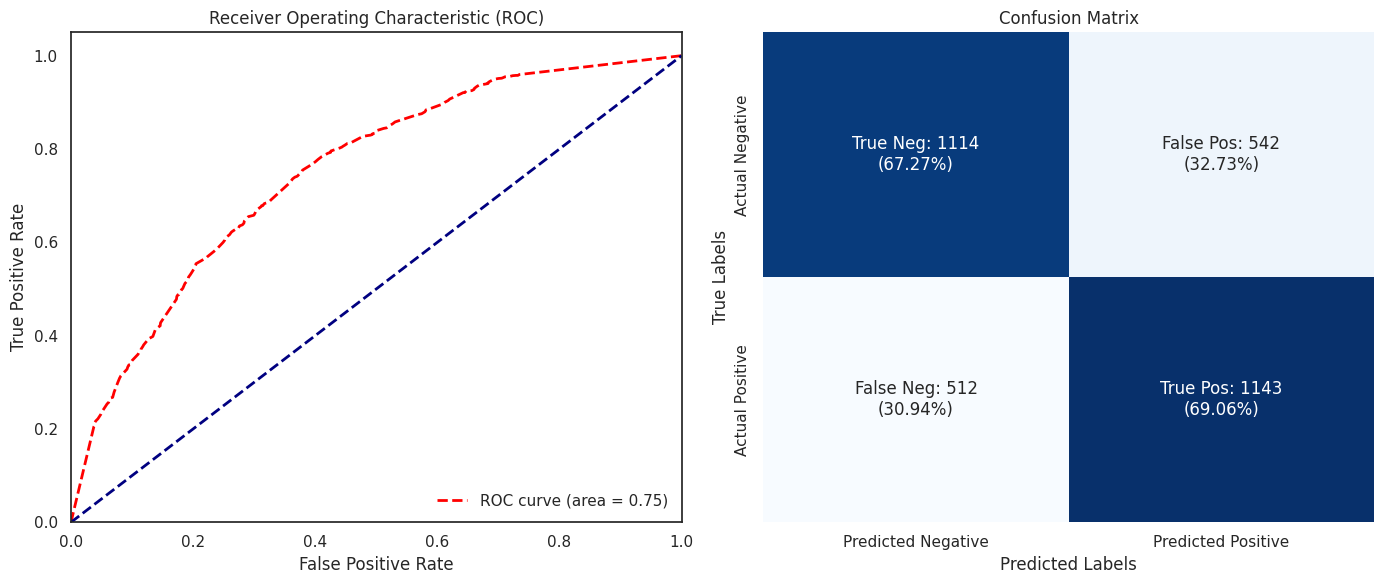

(None,                     Score
Accuracy Score   0.681667
Recall Score     0.690634
Precision Score  0.678338
F1 Score         0.684431
ROC AUC Score    0.749784)
Evaluation after Hyperparameter Tuning 


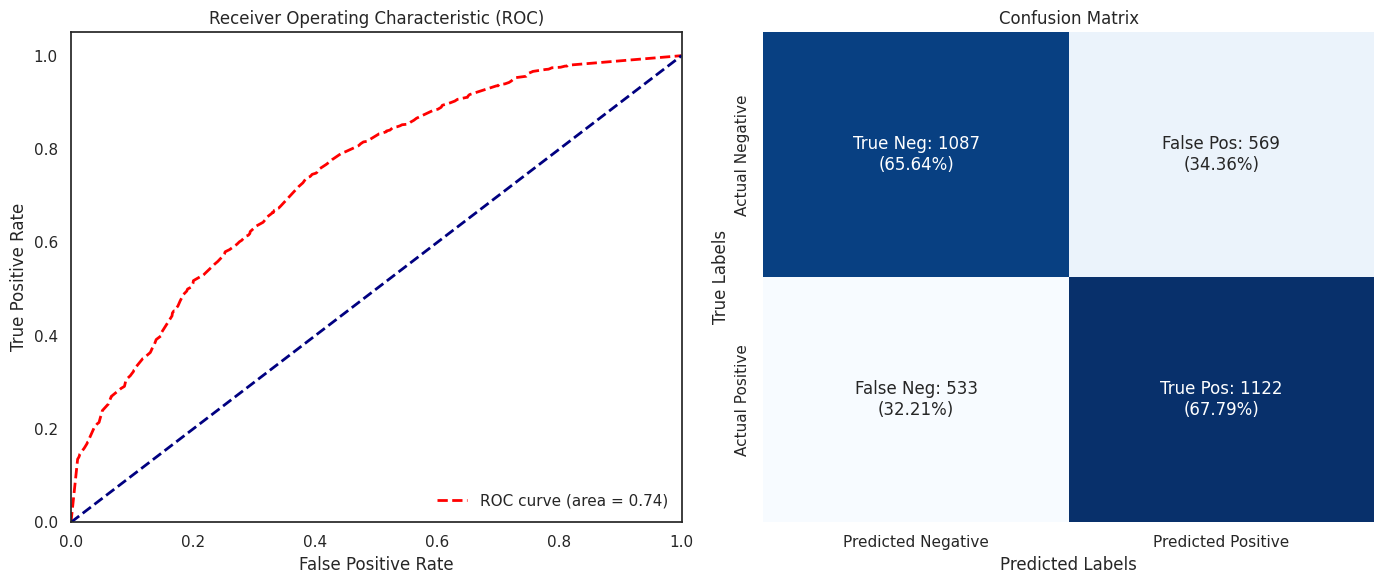

(None,                     Score
Accuracy Score   0.667170
Recall Score     0.677946
Precision Score  0.663513
F1 Score         0.670652
ROC AUC Score    0.738969)
Evaluating the model's performance on an unseen dataset.


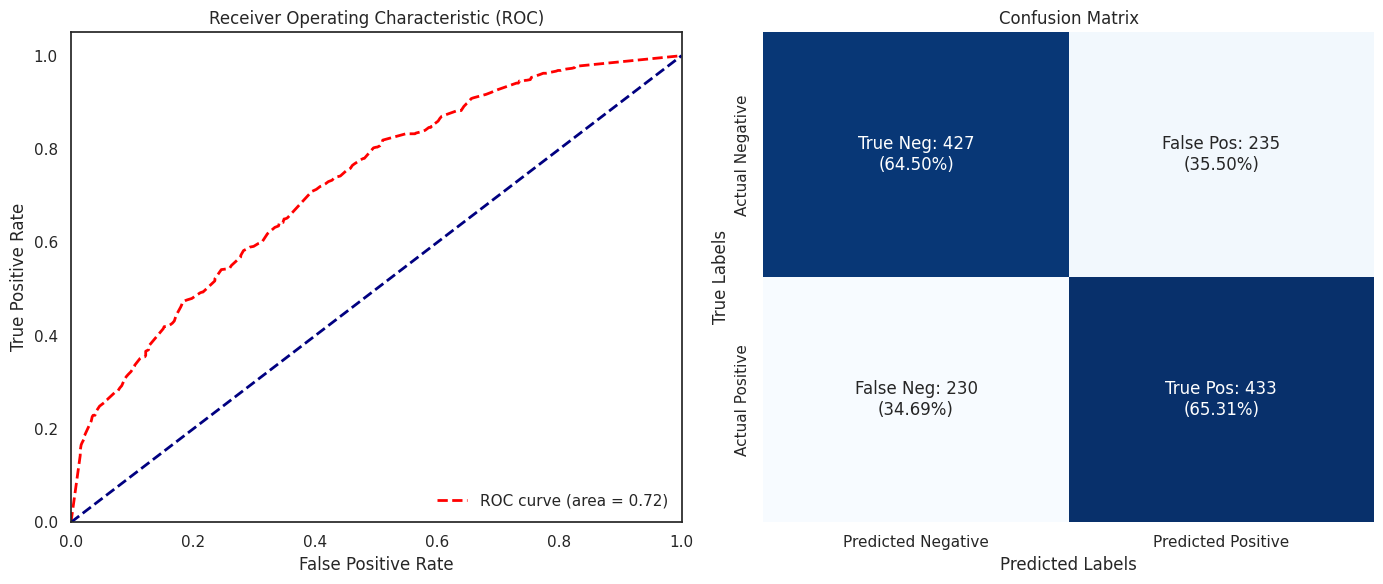

(None,                     Score
Accuracy Score   0.649057
Recall Score     0.653092
Precision Score  0.648204
F1 Score         0.650639
ROC AUC Score    0.723143)


In [ ]:
#Evaluation Metrix
#Evaluation metrics and Roc_curve

print("Evaluation Before Hyperparameter Tuning ")
print(Evaluation_Metrics(D,X_val,Y_val))

print("Evaluation after Hyperparameter Tuning ")
print(Evaluation_Metrics(Da,X_val,Y_val))

print("Evaluating the model's performance on an unseen dataset.")
print(Evaluation_Metrics(Da,X_test,Y_test))


### **3. Random Forest**

In [ ]:

R=RandomForestClassifier(n_jobs=-1)
R.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1)

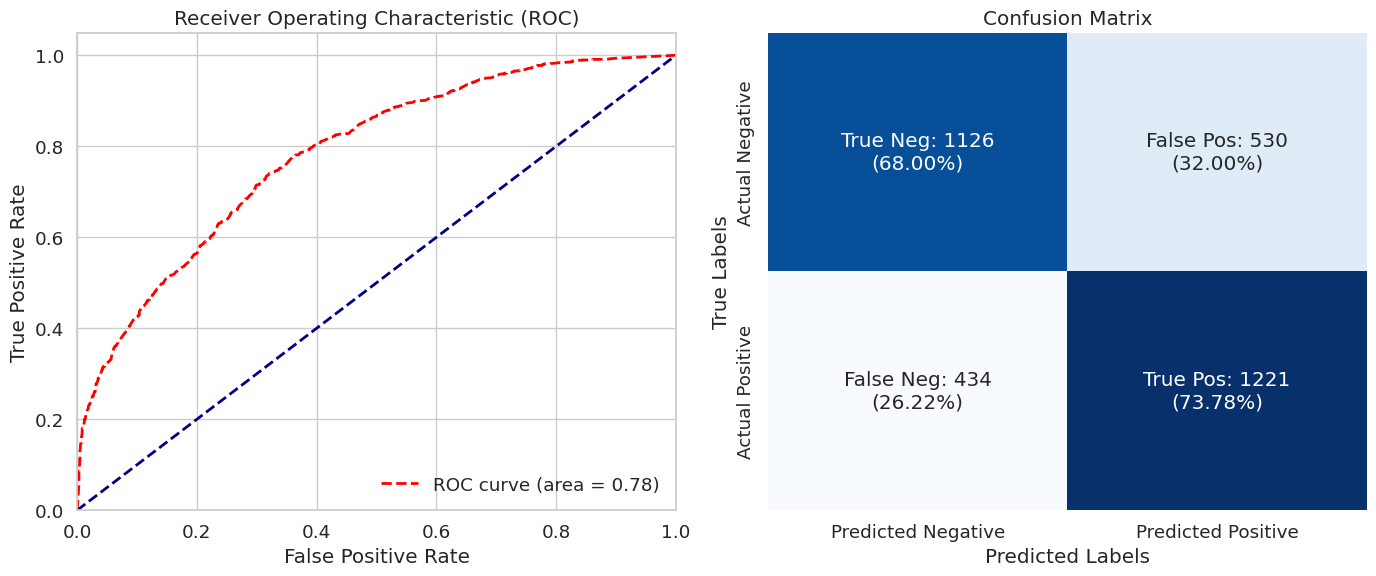

(None,                     Score
Accuracy Score   0.708849
Recall Score     0.737764
Precision Score  0.697316
F1 Score         0.716970
ROC AUC Score    0.782604)


In [ ]:
#Evaluation Metrix
print(Evaluation_Metrics(R, X_val,Y_val))

In [ ]:

param_grid = {
    'n_estimators': [None,150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4],
    'max_features': [ 'sqrt', 'log2'],

}
print(Hyperparameter_tuning(R,X_train,Y_train,param_grid,'HalvingRandomSearchCV'))


n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 7
min_resources_: 12
max_resources_: 11916
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 336
n_resources: 12
Fitting 3 folds for each of 336 candidates, totalling 1008 fits


KeyboardInterrupt: 

In [ ]:
Ra=RandomForestClassifier(
    n_estimators=150,min_samples_split=5,min_samples_leaf=1,max_features='log2',max_depth=10
)

Ra.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=150)

Evaluation Before Hyperparameter Tuning 


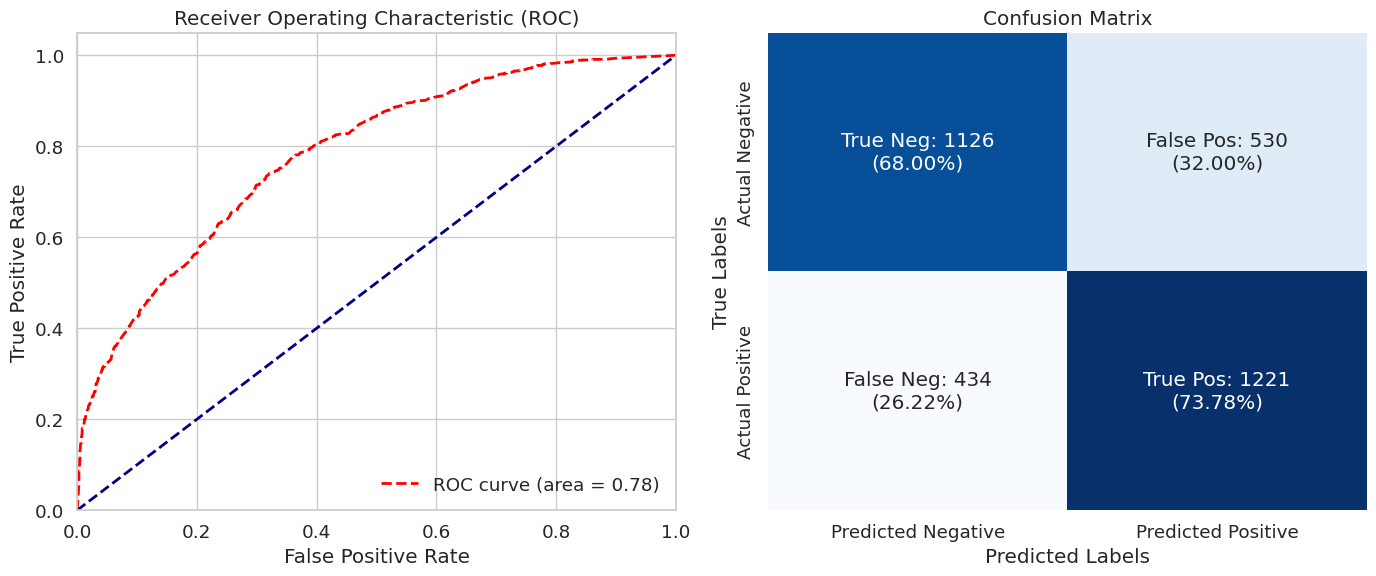

(None,                     Score
Accuracy Score   0.708849
Recall Score     0.737764
Precision Score  0.697316
F1 Score         0.716970
ROC AUC Score    0.782604)
Evaluation after Hyperparameter Tuning 


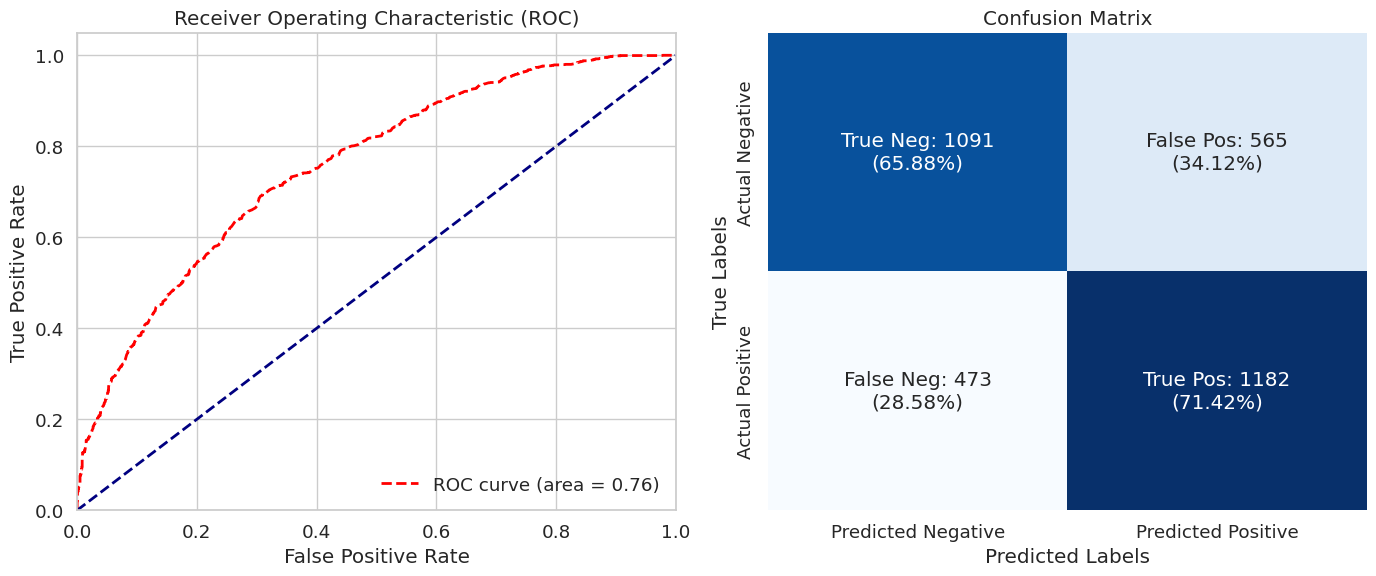

(None,                     Score
Accuracy Score   0.686500
Recall Score     0.714199
Precision Score  0.676588
F1 Score         0.694885
ROC AUC Score    0.756078)
Evaluating the model's performance on an unseen dataset.


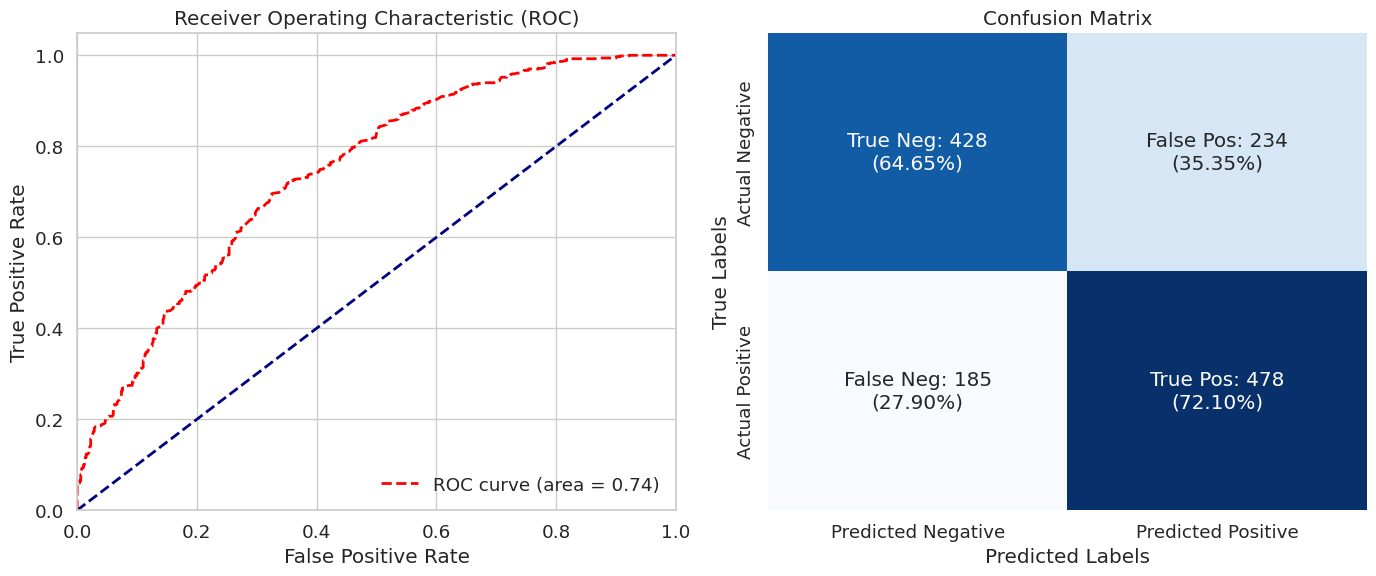

(None,                     Score
Accuracy Score   0.683774
Recall Score     0.720965
Precision Score  0.671348
F1 Score         0.695273
ROC AUC Score    0.743338)


In [ ]:
#Evaluation Metrix
#Evaluation metrics and Roc_curve

print("Evaluation Before Hyperparameter Tuning ")
print(Evaluation_Metrics(R,X_val,Y_val))

print("Evaluation after Hyperparameter Tuning ")
print(Evaluation_Metrics(Ra,X_val,Y_val))

print("Evaluating the model's performance on an unseen dataset.")
print(Evaluation_Metrics(Ra,X_test,Y_test))


###**Saving Model for deployement**

In [ ]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(Ra, file)


In [ ]:
X_train

,user_past_purchases,email_text_long_email,email_text_short_email,email_version_generic,email_version_personalized,user_country_ES,user_country_FR,user_country_UK,user_country_US,weekday_segment_Early_Week,weekday_segment_Late_Week,weekday_segment_Mid_Week,Time_range_Afternoon,Time_range_Evening,Time_range_Morning,Time_range_Night
14628,13,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0
1525,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0
5515,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
603,7,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
9223,5,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3481,7,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
11489,7,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
15818,7,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0


In [ ]:
import pickle
import numpy as np

# Load the model
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Create input array with correct shape (1 sample, 16 features)
x = np.array([13, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]).reshape(1, -1)

# Make prediction
y_pred = loaded_model.predict(x)

print("Predicted:", y_pred[0])


FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

In [ ]:

#create stremlit file app script
#user_past_purchases	email_text_long_email	email_text_short_email	email_version_generic	email_version_personalized	user_country_ES	user_country_FR	user_country_UK	user_country_US	weekday_segment_Early_Week	weekday_segment_Late_Week	weekday_segment_Mid_Week	Time_range_Afternoon	Time_range_Evening	Time_range_Morning	Time_range_Night
#with these columns

keep in mind these categories
#categorising weekdays
def segment_weekday(day):
    if day in ['Monday', 'Tuesday']:
        return 'Early_Week'
    elif day in ['Wednesday', 'Thursday']:
        return 'Mid_Week'
    else:
        return 'Late_Week'

df2['weekday_segment'] = df2['weekday'].apply(segment_weekday)

#categories
#time

def row(x):
  if x >=5 and x< 12:
    return "Morning"
  elif x>=12 and x<17:
    return "Afternoon"
  elif x>=17 and x<22:
    return "Evening"
  else:
    return "Night"

df2['Time_range']=df2.hour.apply(row)


#title would be email click prediction (yiu can choose better then this)

#predict whether based on these email feature user will click or not

#model file is pickle and name is model.pkl


In [ ]:
import joblib

# Assuming `model` is your trained model
joblib.dump(Ra, 'model.pkl')


['model.pkl']

In [ ]:
pip freeze


absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.14.0.37.22
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confe